In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
dftitanic = pd.read_csv("/kaggle/input/titanic/train.csv")
df = dftitanic.copy()

In [4]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def explore_df(df):
    print("=" * 60)
    print("📐 Shape of DataFrame:")
    print(df.shape)
    
    print("\nℹ️ DataFrame Info:")
    print("-" * 40)
    df.info()
    print()  # ensures newline
    
    print("📊 Statistical Summary:")
    print("-" * 40)
    print(df.describe(include='number'))  # safer across pandas versions
    print("=" * 60)


In [6]:
explore_df(df)


📐 Shape of DataFrame:
(891, 12)

ℹ️ DataFrame Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

📊 Statistical Summary:
----------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.0000

**Age:** Out of 491 passengers, age information is available for 714 individuals, while the remaining entries are missing or unknown. The recorded ages range from 0.17 years (infants) to 80 years (eldest passenger).

**Fare:** Regarding the Fare feature, there are instances where the fare value is 0 — this could indicate free tickets, possible sponsorships, or special discounts/coupons. The highest recorded fare is 512, which appears to be a potential outlier, indicating either a luxury ticket class or special service.

**Lets do basic exploration Shape, Columns Names, Data Types, and Null Values**

In [9]:
def basic_exploration(df):
    print("=" * 80)
    print("🔎 Basic Exploration of Dataset")
    print("=" * 80)

    # Shape
    print(f"🗂️ Shape of DataFrame : {df.shape[0]} Rows | {df.shape[1]} Columns")
    
    print("\n📝 Column Names:")
    print(list(df.columns))
    
    print("\n📊 Data Types:")
    print(df.dtypes)
    
    print("\n❓ Null Values:")
    nulls = df.isnull().sum()
    null_percent = (nulls / len(df)) * 100
    null_df = pd.DataFrame({'Missing Values': nulls, 'Percentage': null_percent})
    print(null_df[null_df['Missing Values'] > 0])
    
    print("\n📑 Duplicate Rows:")
    print(f"Total Duplicate Rows: {df.duplicated().sum()}")
    
    print("=" * 80)


In [10]:
display(basic_exploration(df))


🔎 Basic Exploration of Dataset
🗂️ Shape of DataFrame : 891 Rows | 12 Columns

📝 Column Names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

📊 Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

❓ Null Values:
          Missing Values  Percentage
Age                  177   19.865320
Cabin                687   77.104377
Embarked               2    0.224467

📑 Duplicate Rows:
Total Duplicate Rows: 0


None

## Data Cleaning

Before filling the missing values in the **Age** column, we will extract the title from each passenger's name. This will help us group passengers with similar titles and estimate their age more accurately. Once the titles are assigned, we will use groupby on these titles to fill the missing age values based on the median age of each respective title group.

In [15]:
# 1. Extract Title from Name (if exists)
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# 2. Handle Missing or Unknown Titles
df['Title'] = df['Title'].fillna('Unknown')

# 3. Fill Missing Age by Median of each Title Group
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

# Step 4: Backup fill for any remaining NaNs (in case median was NaN)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
df['Age'].isnull().sum()

0

In [16]:
# lets drop the title for now
df.drop('Title', axis=1, inplace=True)

# Let's Explor Fare Col

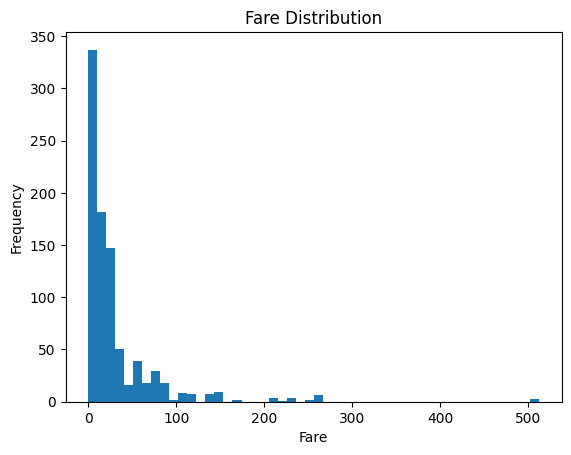

In [17]:
plt.hist(df['Fare'], bins=50)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Handling Zero Fares
df.loc[df['Fare'] == 0, 'Fare'] = df.groupby('Pclass')['Fare'].transform('median')

# Handling Null Fares
df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'))


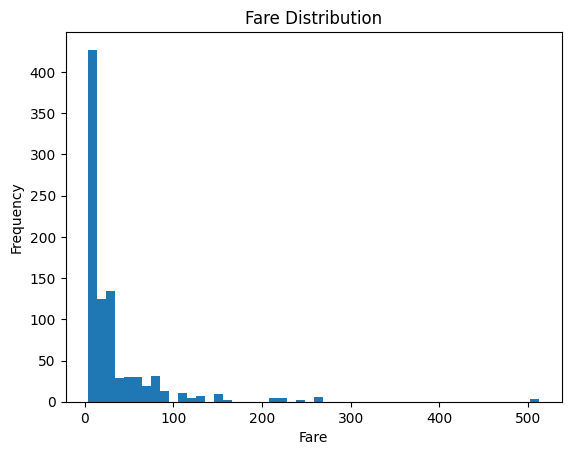

In [19]:
plt.hist(df['Fare'], bins=50)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dftitanic.describe(include = 'all')

In [ ]:
sns.countplot(x= 'Survived', hue= 'Survived', data = dftitanic)

In [ ]:
#check null values in test data
dftitanic.isnull().sum()

<h1>Exploration</h1>

<h3>Exploration of complete and important Variables</h3>

**Survival**

In [ ]:
dftitanic['Survived'].value_counts()

In [ ]:
#survival & Gender
sns.countplot(x = 'Sex', hue = "Survived",data = dftitanic )

**Gender**

In [ ]:
dftitanic['Sex'].value_counts()

In [ ]:
sns.countplot(data= dftitanic, x = 'Sex', hue = 'Sex')

**Survival and Passenger Class**

In [ ]:
dftitanic['Pclass'].value_counts().reset_index()

In [ ]:
dfcomp['Pclass'].value_counts()

In [ ]:
#passenger and survival 

sns.countplot(data=dftitanic, x = 'Pclass', hue = 'Survived')

In [ ]:
sns.countplot(data = dfcomp, x = 'Pclass');

**Passenger Class, Gender and Survival**

In [ ]:
sns.catplot(data = dftitanic, x = 'Sex', col = 'Pclass', kind = 'count' );

In [ ]:
sns.catplot(data = dftitanic, x = 'Pclass', col = 'Sex', hue = 'Survived', kind = 'count');

In [ ]:
#factor plot for dfcomp

sns.catplot(x = 'Sex', col = 'Pclass', kind= 'count', data = dfcomp);

**Looking Up into Name**

In [ ]:
dftitanic['Name'].head(10)

In [ ]:
import re

In [ ]:
a = 'Braund, Mr. Owen Harris'
re.search(' ([A-Z][a-z]+)\.',a).group(1)

In [ ]:
dftitanic['Title'] = dftitanic['Name'].apply(lambda x : re.search(' ([A-Z][a-z]+)\.',x).group(1))

In [ ]:
dftitanic.head()

In [ ]:
dftitanic['Title'].value_counts()

In [ ]:
dfcomp['Title'] = dfcomp['Name'].apply(lambda x : re.search(" ([A-Z][a-z]+)\.", x).group(1))

In [ ]:
dfcomp.head()

In [ ]:
dfcomp['Title'].value_counts()

In [ ]:
dftitanic['Title'] = dftitanic['Title'].replace("Mlle", "Miss")

In [ ]:
dftitanic['Title'] = dftitanic['Title'].replace("Mme", 'Mr')

In [ ]:
dftitanic.loc[(~dftitanic['Title'].isin(['Mr','Mrs','Miss', 'Master'])), 'Title'] = "Rare Title"

In [ ]:
dftitanic['Title'].value_counts()

In [ ]:
dfcomp.loc[(~dfcomp['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [ ]:
dfcomp['Title'].unique()

In [ ]:
sns.countplot(x = 'Title', data = dftitanic);

In [ ]:
sns.countplot(x = 'Title', hue = 'Survived', data = dftitanic)

In [ ]:
sns.countplot(x = 'Title', data = dfcomp);

<h1>Traveling Alone and Traveling in Group</h1>

**Family Size**

In [ ]:
dftitanic['Fsize'] = dftitanic['SibSp'] + dftitanic['Parch'] + 1

In [ ]:
dfcomp['Fsize'] = dfcomp['SibSp'] + dfcomp['Parch'] + 1

In [ ]:
dftitanic.head()

In [ ]:
sns.countplot(x = 'Fsize', data = dftitanic)

In [ ]:
sns.countplot(x = 'Fsize', hue = 'Survived', data = dftitanic);

In [ ]:
dftitanic['Survived'].value_counts(normalize = True)

In [ ]:
dftitanic.groupby('Fsize')['Survived'].value_counts(normalize = True).reset_index(name = 'Perc')

**Highest Suvival Rate Shows by Fsize =4**

**With Dodge**

In [ ]:
temp = dftitanic.groupby('Fsize')['Survived'].value_counts(normalize = True).reset_index(name = 'Perc')
plt.figure(figsize = (10, 12))
sns.barplot(x = 'Fsize', y = 'Perc', hue = 'Survived', data = temp, dodge = True)

**Without Dodge**

In [ ]:
temp = dftitanic.groupby('Fsize')['Survived'].value_counts(normalize = True).reset_index(name = 'Perc')
plt.figure(figsize = (5, 6))
sns.barplot(x = 'Fsize', y = 'Perc', hue = 'Survived', data = temp, dodge = False)

In [ ]:
temp_1 = dftitanic.loc[dftitanic['Fsize'] == 7, :]
plt.figure(figsize = (5, 5));
sns.countplot(x = 'Pclass', hue= 'Survived', data = temp_1, dodge = True );

In [ ]:
temp_1 = dftitanic.loc[dftitanic['Fsize'] == 7, :]
plt.figure(figsize = (5, 5));
sns.countplot(x = 'Sex', hue= 'Survived', data = temp_1, dodge = True );

**How many people booked together**

In [ ]:
dftitanic['Ticket'].value_counts().reset_index()

In [ ]:
# dfff = dftitanic.copy()

In [ ]:
temp = dftitanic['Ticket'].value_counts().reset_index(name='Tsize')
# temp = temp.reset_index(drop=True)
# temp = temp.set_index('Ticket')
print(temp)

In [ ]:
dftitanic = dftitanic.merge(temp, left_on='Ticket', right_on='Ticket',how='inner')

In [ ]:
dftitanic.head()

In [ ]:
sns.countplot(x = 'Tsize', hue = 'Survived', data = dftitanic);

**Analyse Tsize and survive with percentage**

In [ ]:
temp = dftitanic.groupby('Tsize')['Survived'].value_counts(normalize = True).reset_index(name = 'perc')
temp

In [ ]:
sns.barplot(data = temp, x = 'Tsize' , y = 'perc', hue = 'Survived', dodge = True);

<h1>Consolidating family & friends</h1>

In [ ]:
dftitanic['Group'] = dftitanic[['Tsize', 'Fsize']].max(axis=1)

In [ ]:
dftitanic.head()

In [ ]:
plt.figure(figsize = (5,6));
sns.countplot(x = 'Group', hue = 'Survived', data = dftitanic);

In [ ]:
dftitanic['GrpSize'] = 'NA'
dftitanic.head()

In [ ]:
dftitanic['GrpSize'] = ''
dftitanic.loc[dftitanic['Group']==1, 'GrpSize'] = 'solo'
dftitanic.loc[dftitanic['Group']==2, 'GrpSize'] = 'couple'
dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'] = 'group'
dftitanic.loc[dftitanic['Group']>4, 'GrpSize'] = 'large group'
dftitanic.head()

In [ ]:
plt.figure(figsize=(15,6));
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=dftitanic);

**same will be on test data**

In [ ]:
temp = dfcomp['Ticket'].value_counts().reset_index(name='Tsize')
temp

In [ ]:
dfcomp = dfcomp.merge(temp, left_on = 'Ticket', right_on = 'Ticket', how = 'inner')

In [ ]:
dfcomp['Group'] = dfcomp[['Fsize','Tsize']].max(axis = 1)

In [ ]:
dfcomp['GrpSize'] = ''
dfcomp.loc[dfcomp['Group']==1, 'GrpSize'] = 'solo'
dfcomp.loc[dfcomp['Group']==2, 'GrpSize'] = 'couple'
dfcomp.loc[(dfcomp['Group']<=4) & (dfcomp['Group']>=3), 'GrpSize'] = 'group'
dfcomp.loc[dfcomp['Group']>4, 'GrpSize'] = 'large group'
dfcomp.head()

<h1>Effects of Fare</h1>

In [ ]:
dftitanic['Fare'].isnull().sum()

**KDE = kernal density estimation**

In [ ]:
plt.subplots(figsize = (10, 6));
sns.histplot(dftitanic['Fare'],kde = True);

In [ ]:
dftitanic[dftitanic['Fare'] < 0] #it show us that how many passenger traveling with less zero fare

In [ ]:
dftitanic['Fare'].mean()

In [ ]:
dftitanic['Fare'].median()

**We will use median because fare shows right skewness**

 *we can't calculate median for all Pclass with same median*

In [ ]:
dftitanic.loc[dftitanic['Pclass'] == 1, 'Fare'].median()

In [ ]:
dftitanic.loc[dftitanic['Pclass'] == 2, 'Fare'].median()

In [ ]:
dftitanic.loc[dftitanic['Pclass'] == 3, 'Fare'].median()

In [ ]:
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 1), 'Fare'] = dftitanic[dftitanic['Pclass'] == 1]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 2), 'Fare'] = dftitanic[dftitanic['Pclass'] == 2]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 3), 'Fare'] = dftitanic[dftitanic['Pclass'] == 3]['Fare'].median()


In [ ]:
dftitanic['Fare'].isnull().sum()

In [ ]:
dftitanic["FareCat"] = ''
dftitanic.loc[dftitanic['Fare']<=10, 'FareCat'] = '0-10'
dftitanic.loc[(dftitanic['Fare'] > 10) & (dftitanic['Fare'] <= 25), 'FareCat'] = '10-25'
dftitanic.loc[(dftitanic['Fare'] > 25) & (dftitanic['Fare'] <= 40), 'FareCat'] = '25-40'
dftitanic.loc[(dftitanic['Fare'] > 40) & (dftitanic['Fare'] <= 70), 'FareCat'] = '40-70'
dftitanic.loc[(dftitanic['Fare']> 70) & (dftitanic['Fare'] <= 100), 'FareCat'] = '70-100'
dftitanic.loc[(dftitanic['Fare'] > 100), 'FareCat'] = '100+'
dftitanic[['Fare', 'FareCat']].head()

In [ ]:
plt.subplots(figsize = (15,6));
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=dftitanic);
plt.show()

***For Test Data***

In [ ]:
dfcomp.loc[(dfcomp['Fare'] == 0) & (dfcomp['Pclass'] == 1), 'Fare'] = dfcomp[dfcomp['Pclass'] == 1]['Fare'].median()
dfcomp.loc[(dfcomp['Fare'] == 0) & (dfcomp['Pclass'] == 2), 'Fare'] = dfcomp[dfcomp['Pclass'] == 2]['Fare'].median()
dfcomp.loc[(dfcomp['Fare'] == 0) & (dfcomp['Pclass'] == 3), 'Fare'] = dfcomp[dfcomp['Pclass'] == 3]['Fare'].median()


In [ ]:
dfcomp['FareCat'] = ''
dfcomp.loc[dfcomp['Fare']<=10, 'FareCat'] = '0-10'
dfcomp.loc[(dfcomp['Fare'] > 10) & (dfcomp['Fare'] <= 25), 'FareCat'] = '10-25'
dfcomp.loc[(dfcomp['Fare'] > 25) & (dfcomp['Fare'] <= 40), 'FareCat'] = '25-40'
dfcomp.loc[(dfcomp['Fare'] > 40) & (dfcomp['Fare'] <= 70), 'FareCat'] = '40-70'
dfcomp.loc[(dfcomp['Fare']> 70) & (dfcomp['Fare'] <= 100), 'FareCat'] = '70-100'
dfcomp.loc[(dfcomp['Fare'] > 100), 'FareCat'] = '100+'
dfcomp[['Fare', 'FareCat']].head()

In [ ]:
dfcomp.head()

## Effect of Embarked Value

In [ ]:
plt.subplots(figsize = (14, 5));
sns.countplot(x = 'Embarked', hue ='Survived', data = dftitanic);

In [ ]:
dftitanic.describe(include = 'O')

In [ ]:
dftitanic['Embarked'].isnull().sum()

In [ ]:
dftitanic.loc[dftitanic['Embarked'].isnull(),'Embarked']= 'S'

In [ ]:
dftitanic['Embarked'].isna().sum()

**Missing Values**

<h1>Age</h1>

In [ ]:
dftitanic.describe()

In [ ]:
sns.histplot(x = 'Age', data = dftitanic, binwidth = 5);

In [ ]:
sns.kdeplot(dftitanic['Age'], fill = True)

In [ ]:
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'], fill = True, label = 'Not Suvived');
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'], fill = True, label = 'Suvived');

In [ ]:
dftitanic.groupby('Pclass')['Age'].median()

In [ ]:
temp = dftitanic[dftitanic['Age'].isnull()  == False]

In [ ]:
sns.set_context("poster");
sns.catplot(x = "Age", col = 'Title', row = 'Pclass', kind = 'box', data = temp)

In [ ]:
for t in dftitanic['Title'].unique():
    for p in dftitanic['Pclass'].unique():
        dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p) & (dftitanic['Age'].isnull()), 'Age'] = dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p), 'Age'].median()


In [ ]:
sns.set_context('talk')
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'], fill = True, label = 'Not Suvived');
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'], fill = True, label = 'Suvived');

In [ ]:
dftitanic['AgeCat'] = ''
dftitanic.loc[(dftitanic['Age'] <= 16), 'AgeCat'] = '0-16'
dftitanic.loc[(dftitanic['Age'] > 16) & (dftitanic['Age'] <= 32), 'AgeCat'] = '16-32'
dftitanic.loc[(dftitanic['Age'] > 32) & (dftitanic['Age'] <= 48), 'AgeCat'] = '32-48'
dftitanic.loc[(dftitanic['Age'] > 48) & (dftitanic['Age'] <= 64), 'AgeCat'] = '48-64'
dftitanic.loc[dftitanic['Age'] > 64, 'AgeCat'] = '64+'

In [ ]:
dfcomp['Age'].isnull().sum()

**Replace Missing Values of Age and Fair in dfcomp**

In [ ]:
dfcomp.head()

In [ ]:
for t in dfcomp['Title'].unique():
    for p in dfcomp['Pclass'].unique():
        dfcomp.loc[(dfcomp['Title'] == t) & (dfcomp['Pclass'] == p) & (dfcomp['Age'].isnull()), 'Age'] = dfcomp.loc[(dfcomp['Title'] == t) & (dfcomp['Pclass'] == p), 'Age'].median()


In [ ]:
dfcomp['Age'].isnull().sum()

In [ ]:
dfcomp.loc[(dfcomp['Age'].isnull()), :]

In [ ]:
dfcomp.loc[(dfcomp['Age'].isnull()) & (dfcomp['Pclass'] == 3) & (dfcomp['Title'] == 'Rare Title'), 'Age'] = dfcomp.loc[(dfcomp['Title'] == 'Rare Title'), 'Age'].median()

In [ ]:
dfcomp['Age'].isnull().sum()

In [ ]:
dfcomp['AgeCat'] = ''
dfcomp.loc[(dfcomp['Age'] <= 16), 'AgeCat'] = '0-16'
dfcomp.loc[(dfcomp['Age'] > 16) & (dfcomp['Age'] <= 32), 'AgeCat'] = '16-32'
dfcomp.loc[(dfcomp['Age'] > 32) & (dfcomp['Age'] <= 48), 'AgeCat'] = '32-48'
dfcomp.loc[(dfcomp['Age'] > 48) & (dfcomp['Age'] <= 64), 'AgeCat'] = '48-64'
dfcomp.loc[dfcomp['Age'] > 64, 'AgeCat'] = '64+'

In [ ]:
dfcomp.head(1)

## Droping Cabin

In [ ]:
dftitanic['Cabin'].head()

In [ ]:
dftitanic['CabinType'] = dftitanic['Cabin'].str[0]

In [ ]:
plt.figure(figsize = (15, 6));
sns.countplot(x = 'CabinType', hue = 'Survived', data = dftitanic);

In [ ]:
dftitanic.groupby(['CabinType', 'Pclass'])['Pclass'].count()

In [ ]:
dftitanic.drop('CabinType', axis = 1, inplace = True)

In [ ]:
dftitanic.drop('Cabin', axis = 1, inplace = True)

**Drop Cabin from Test Data (dfcomp)**

In [ ]:
dfcomp.drop('Cabin', axis = 1, inplace = True)

In [ ]:
# check missing values
dftitanic.isnull().sum()

In [ ]:
dfcomp.isnull().sum()

## Feature Selection

In [ ]:
dftitanic.head()

**fmt = format**

In [ ]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
numeric_columns = dftitanic.select_dtypes(include=['number']).drop('PassengerId', axis=1)
cor = numeric_columns.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(cor, annot=True, fmt='.1g')

In [ ]:
drop_features = ['Name', 'Age', 'Fare', 'Ticket', 'Fsize', 'Tsize', 'Group']

In [ ]:
dftitanic.drop(drop_features, axis = 1, inplace = True)

In [ ]:
dftitanic.head()

In [ ]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
numeric_columns = dfcomp.select_dtypes(include=['number']).drop('PassengerId', axis=1)
cor = numeric_columns.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(cor, annot=True, fmt='.1g')

In [ ]:
dfcomp.drop(drop_features, axis = 1, inplace = True)

In [ ]:
dftitanic.to_csv('Titanic_clean.csv', index = False)
dftitanic.to_excel('Titanic_clearn.xlsx', index = False)

In [ ]:
dfcomp.to_csv("competition_clean.csv", index = False)

In [ ]:
dfcomp